In [10]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns ; sns.set()
from sklearn import datasets
from sklearn.preprocessing import StandardScaler

# Data Generation

This time, I'm giving you a lot of code to rest on, but take a good look and understand what's going on!

In [11]:
X_blobs, y_blobs = datasets.make_blobs(n_samples=500, centers=np.array([[0,0],[5,5]]))
X_blobs = StandardScaler().fit_transform(X_blobs)

In [12]:
X_xor_blobs, y_xor_blobs = datasets.make_blobs(n_samples=1000, centers=np.array([[5,0],[5,5],[0,0],[0,5]]))
y_xor_blobs[y_xor_blobs==3] = 0
y_xor_blobs[y_xor_blobs==2] = 1
X_xor_blobs = StandardScaler().fit_transform(X_xor_blobs)

In [13]:
X_circles, y_circles = datasets.make_circles(n_samples=500, noise=.1, factor=.5)
X_circles = StandardScaler().fit_transform(X_circles)

In [14]:
X_moons, y_moons = datasets.make_moons(n_samples=500, noise=.2)
X_moons = StandardScaler().fit_transform(X_moons)

In [15]:
def make_spirals(n_samples=100, classes= 2, noise=0.0, n_loops=2):
    n_samples = n_samples // classes
    x = np.linspace(0, 1, n_samples)
    angles = np.linspace(0, 2*np.pi*n_loops, n_samples)
    init = np.linspace(0, np.pi, classes) 
    X = np.vstack([np.c_[x*np.cos(angles + start)+np.random.randn(n_samples)*noise,
                         x*np.sin(angles + start)+np.random.randn(n_samples)*noise, 
                         np.full(n_samples,label)] 
                    for label, start in enumerate(init)])
    np.random.shuffle(X)
    return X[:,:-1], X[:,-1]

In [16]:
X_spirals, y_spirals = make_spirals(n_samples=500, noise=.04)
X_spirals = StandardScaler().fit_transform(X_spirals)

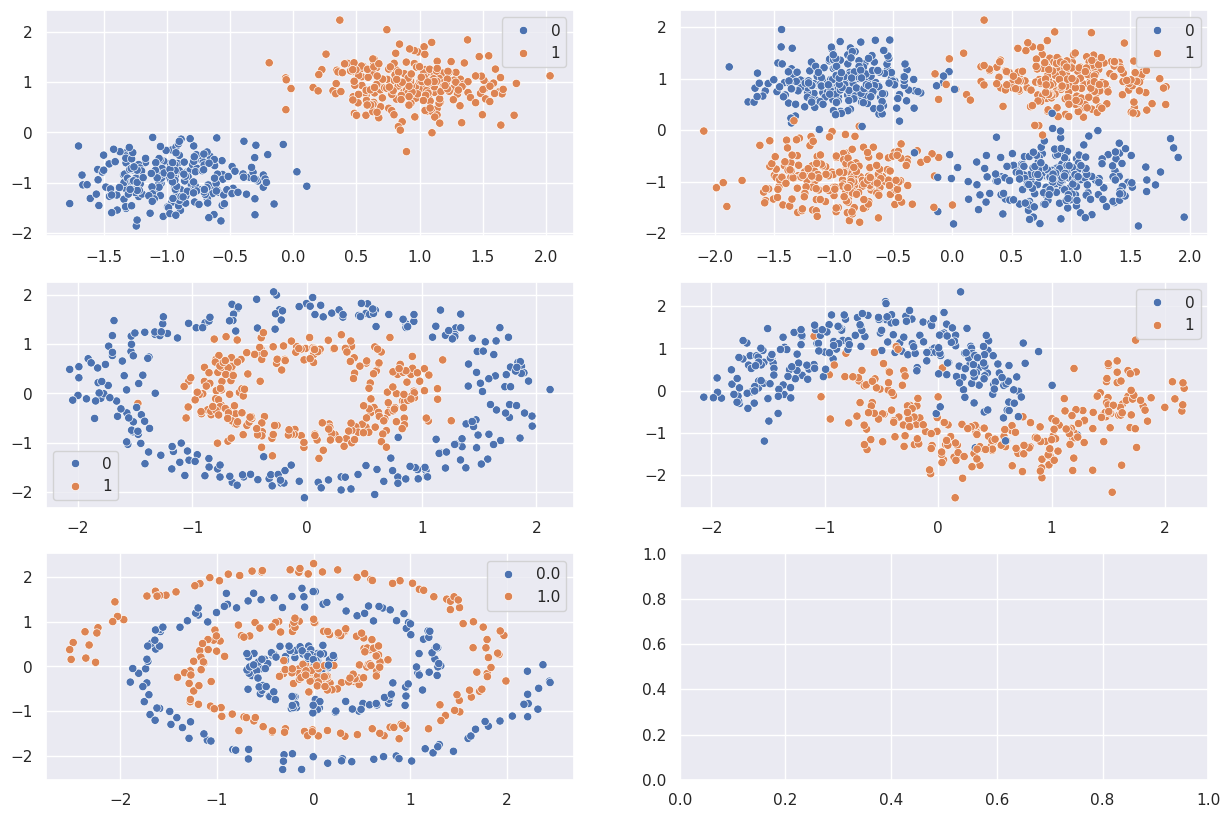

In [17]:
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(15,10))
sns.scatterplot(x=X_blobs[:,0], y=X_blobs[:,1], hue=y_blobs, ax=ax[0,0])
sns.scatterplot(x=X_xor_blobs[:,0], y=X_xor_blobs[:,1], hue=y_xor_blobs, ax=ax[0,1])
sns.scatterplot(x=X_circles[:,0], y=X_circles[:,1], hue=y_circles, ax=ax[1,0])
sns.scatterplot(x=X_moons[:,0], y=X_moons[:,1], hue=y_moons, ax=ax[1,1])
sns.scatterplot(x=X_spirals[:,0], y=X_spirals[:,1], hue=y_spirals, ax=ax[2,0])
None

# Drawing decision contours

**Question** Read the [meshgrid](https://numpy.org/doc/stable/reference/generated/numpy.meshgrid.html) documentation and try and understand the last example: 
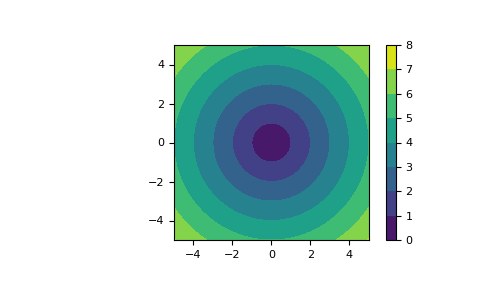

In [19]:
np.meshgrid?

#### Application 

Let's dot it on an MLP.

In [20]:
X, y = X_xor_blobs, y_xor_blobs

In [22]:
step=.2
x_min, x_max = X[:, 0].min(), X[:, 0].max() + step
y_min, y_max = X[:, 1].min(), X[:, 1].max() + step
xx, yy = np.meshgrid(np.arange(x_min, x_max, step),
                     np.arange(y_min, y_max, step))

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [26]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split

In [27]:
mlp = MLPClassifier(max_iter=5000)

In [28]:
mlp.fit(X_train, y_train).score(X_test, y_test)

0.976

### use predict_proba for the contours

In [29]:
Z = mlp.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
Z = Z.reshape(xx.shape)

<AxesSubplot: >

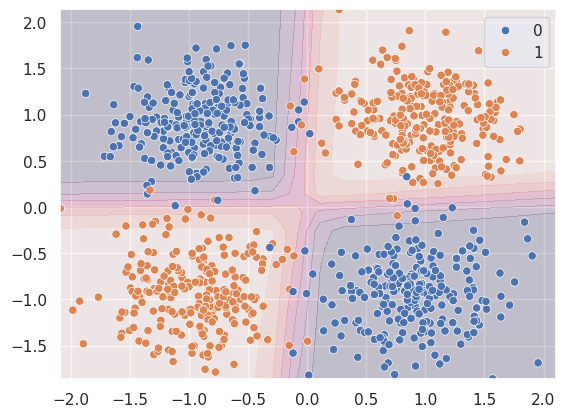

In [30]:
plt.contourf(xx, yy,  Z, alpha=.2)
sns.scatterplot(x=X[:,0], y=X[:,1], hue=y)

### Everything in a function

In [32]:
def trace(X, y, clf, step=0.1):
    x_min, x_max = X[:, 0].min()-step, X[:, 0].max()+2*step
    y_min, y_max = X[:, 1].min()-step, X[:, 1].max()+2*step
    xx, yy = np.meshgrid(np.arange(x_min, x_max, step),
                         np.arange(y_min, y_max, step))
    X_train, X_test, y_train, y_test = train_test_split(X, y)
    clf.fit(X_train, y_train)
    Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy,  Z, alpha=.2)
    sns.scatterplot(x=X[:,0], y=X[:,1], hue=y)
    return clf.score(X_train, y_train), clf.score(X_test, y_test)

**Question** Repeat that procedure on the circle and spiral data sets.

(0.992, 0.992)

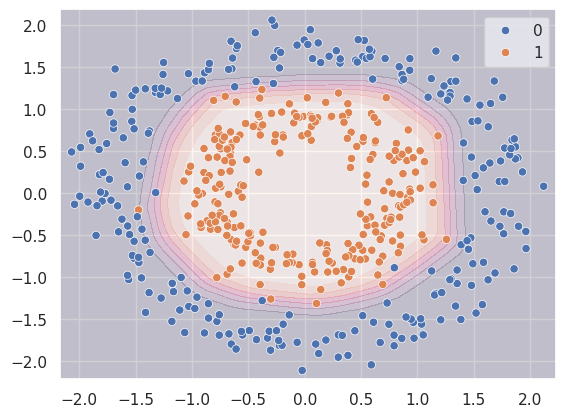

In [33]:
trace(X_circles, y_circles, mlp)

(0.888, 0.768)

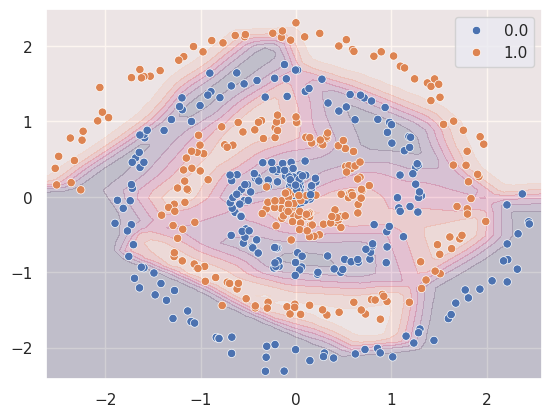

In [34]:
trace(X_spirals, y_spirals, mlp)

(0.9733333333333334, 0.96)

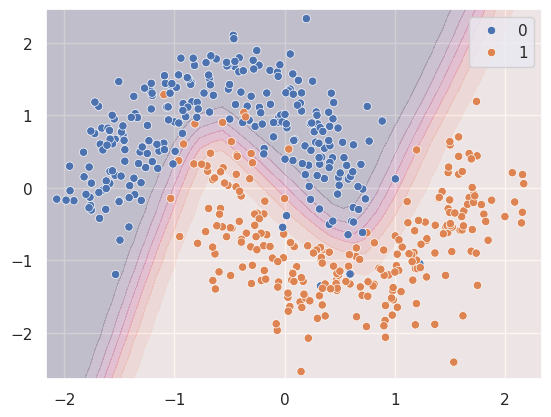

In [35]:
trace(X_moons, y_moons, mlp)

(1.0, 1.0)

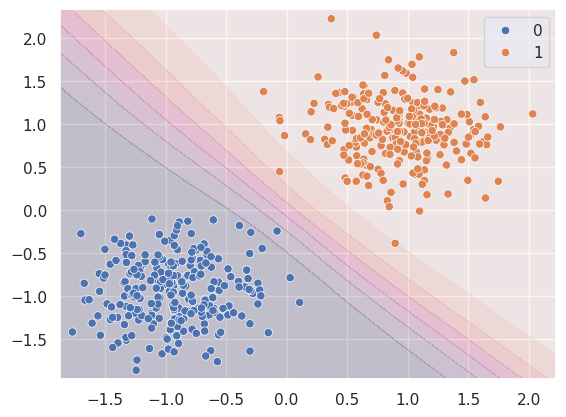

In [36]:
trace(X_blobs, y_blobs, mlp)

# A bit further

**Question** Find the minimum MLP architectures that allow us to obtain a test error rate of at least 0.8 on the above data sets. Keep relu as the activation function and only play with the `hidden_layer_sizes` parameter. Look at the results obtained by plotting the decision contours and conclude!

In [37]:
from sklearn.model_selection import cross_val_score

In [38]:
def my_score(X, y, size=(100,)):
    mlp.set_params(hidden_layer_sizes=size)
    return np.mean(cross_val_score(mlp, X, y))

In [45]:
datasets = [{
    'name': 'blobs',  
    'X': X_blobs,
    'y': y_blobs
},
{
    'name': 'xor_blobs', 
    'X': X_xor_blobs,
    'y': y_xor_blobs
},
{
    'name': 'circles', 
    'X': X_circles, 
    'y': y_circles
},
{
    'name': 'moons', 
    'X': X_moons, 
    'y': y_moons
},
{
    'name': 'spirals', 
    'X': X_spirals, 
    'y': y_spirals
}]

for d in datasets:
    best_score = {'size': 'N/A', 'score': 0.0}
    for i in range (1, 101):
        hidden_size = (i,)
        
        s = my_score(d['X'], d['y'], hidden_size)
        
        if s >= 0.8:
            best_score['size'] = i
            best_score['score'] = s
            
            break
    
    print(f"Dataset: {d['name']} => min_size: {best_score['size']}, score: {best_score['score']}")

Dataset: blobs => min_size: 1, score: 1.0
Dataset: xor_blobs => min_size: 3, score: 0.8149999999999998
Dataset: circles => min_size: 4, score: 0.884
Dataset: moons => min_size: 1, score: 0.8


/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5000) reached and the optimization hasn't converged yet.
  warnings.warn(


Dataset: spirals => min_size: 66, score: 0.8140000000000001


*Response*:

    Dataset: blobs => min_size: 1, score: 1.0
    Dataset: xor_blobs => min_size: 3, score: 0.8149999999999998
    Dataset: circles => min_size: 4, score: 0.884
    Dataset: moons => min_size: 1, score: 0.8
    Dataset: spirals => min_size: 66, score: 0.
    
The results show that for simple datasets like blobs or circles, the MLP reauires little amount of hidden layers (less than 5). But for a complex dataset like spirals, the MLP requires a lot of hidden layers to correctly classify the data. For example, here the MLP model used 66 hidden layers to obtain a score 0.8. 

In [55]:
def plot_decision_contours(X, y, clf, size):
    step=0.1
    
    x_min, x_max = X[:, 0].min()-step, X[:, 0].max()+2*step
    y_min, y_max = X[:, 1].min()-step, X[:, 1].max()+2*step
    xx, yy = np.meshgrid(np.arange(x_min, x_max, step),
                         np.arange(y_min, y_max, step))
    
    X_train, X_test, y_train, y_test = train_test_split(X, y)
    clf.set_params(hidden_layer_sizes=(size,))
    clf.fit(X_train, y_train)

    Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy,  Z, alpha=.2)
    sns.scatterplot(x=X[:,0], y=X[:,1], hue=y)

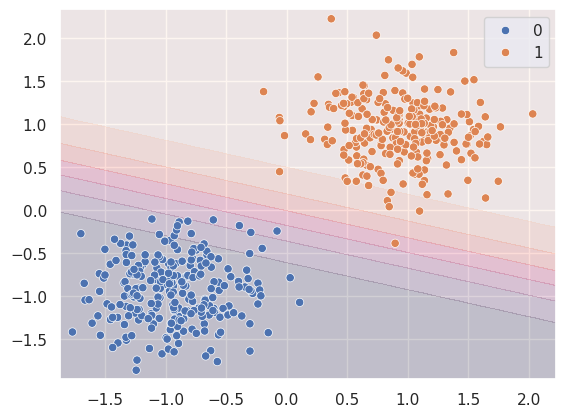

In [56]:
plot_decision_contours(X_blobs, y_blobs, mlp, 1)

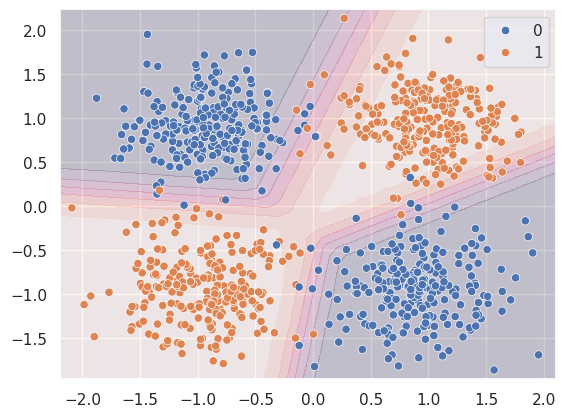

In [57]:
plot_decision_contours(X_xor_blobs, y_xor_blobs, mlp, 3)

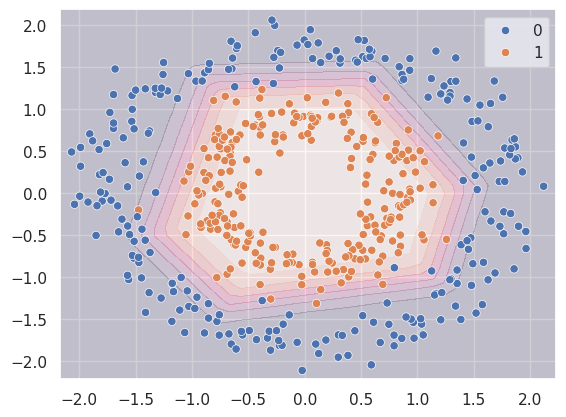

In [58]:
plot_decision_contours(X_circles, y_circles, mlp, 4)

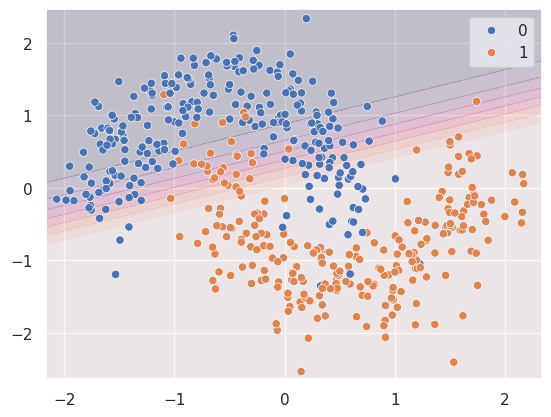

In [59]:
plot_decision_contours(X_moons, y_moons, mlp, 1)

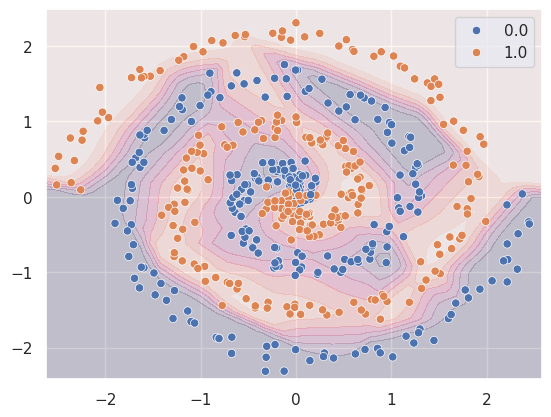

In [60]:
plot_decision_contours(X_spirals, y_spirals, mlp, 66)